
###### Question 1

Explore the data and answer the following:
What type of attributes of the data?
Using a scatter plot, what pattern can you see? Why?

###### Question 2
Experiment with the SVM algorithm introduced in this lab to predict the class of the data. Use default parameter configurations. Then, try to conduct also cross-validation as per the one applied in this lab. Compare the algorithms and specify your findings. Answer the following questions:
Do cross-validation effect algorithms' performance?
Test SVM with at least two other kernels and compare them to the linear kernel. How much they differ?


# Step 2: Data Understanding

In [1]:
# Import important libarery 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# import dataset and add columm names to the imporated dataset

colName = ['buying','maintenance','doors','persons','luggage boot','safety','class']
data = pd.read_csv('https://raw.githubusercontent.com/abdo-projects/data-science-portfolio/main/Dataset/car.csv', names = colName)

# Show the the tope 5 obersrvation of the dataset
display(data.head(5))

#Show data desccription
display(data.describe())

#show data shape
display(data.shape)

# show data type

display(data.dtypes)

,buying,maintenance,doors,persons,luggage boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


,buying,maintenance,doors,persons,luggage boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


(1728, 7)

buying          object
maintenance     object
doors           object
persons         object
luggage boot    object
safety          object
class           object
dtype: object

- Because all data attributes are categorical, in order to plot heat map, it has to be encoded into numerical attributes as heat map plot only accept clean numerical attribute   

In [2]:
# sum of null data based on attributes. In this case 3 column have missing values; (Age, Cabin, and Embarked)
data.isnull().sum()

buying          0
maintenance     0
doors           0
persons         0
luggage boot    0
safety          0
class           0
dtype: int64

- there are no null value in the dataset 

In [3]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#data_enc=data.apply(LabelEncoder().fit_transform)

# Create an empty DataFram
column_names = []
data_enc = pd.DataFrame(columns = column_names)

# Convert categorical variable to numeric
data_enc["buying"] = np.where(data["buying"]=="low",0,np.where(data["buying"]=="med",1,np.where(data["buying"]=="high",2,3)))
data_enc["maintenance"] = np.where(data["maintenance"]=="low",0,np.where(data["maintenance"]=="med",1,np.where(data["maintenance"]=="high",2,3)))
data_enc["doors"] = np.where(data["doors"]=="2",0,np.where(data["doors"]=="3",1,np.where(data["doors"]=="4",2,3)))
data_enc["persons"] = np.where(data["persons"]=="2",0,np.where(data["persons"]=="4",1,2))
data_enc["luggage boot"] = np.where(data["luggage boot"]=="small",0,np.where(data["luggage boot"]=="med",1,2))
data_enc["safety"] = np.where(data["safety"]=="low",0,np.where(data["safety"]=="med",1,2))
data_enc["class"] = np.where(data["class"]=="unacc",0,np.where(data["class"]=="acc",1,np.where(data["class"]=="good",2,3)))

In [4]:
display(data_enc.head(5))

,buying,maintenance,doors,persons,luggage boot,safety,class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


(7.5, -0.5)

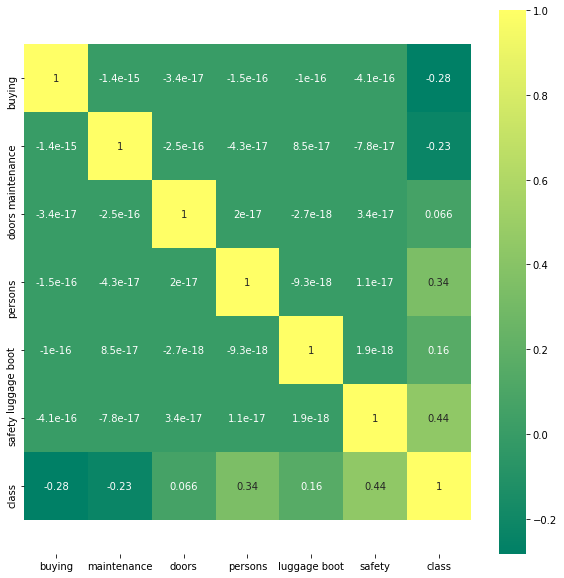

In [5]:
# correlations using heat map plot
plt.figure(figsize=(10,10))
ax = sns.heatmap(data_enc.corr(),annot=True,cmap='summer', cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- The heat map plot shows no correlation between attributes     

<AxesSubplot:xlabel='class', ylabel='count'>

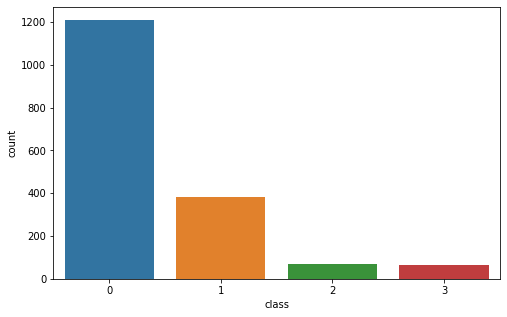

In [6]:
plt.figure(figsize=(8,5))

# count rows of each classes

sns.countplot(x=data_enc["class"], data=data_enc)

- The figure shows clearly that the class is not evenly distributed with value “unacc” has the highest count, which indicates that the dataset has imbalanced class distribution.Imbalanced class distribution will result in Imbalanced Classification a predictive modeling issue where the distribution of observations across the classes are not equal.

C:\Users\a7med\anaconda3\envs\Main_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\a7med\anaconda3\envs\Main_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\a7med\anaconda3\envs\Main_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

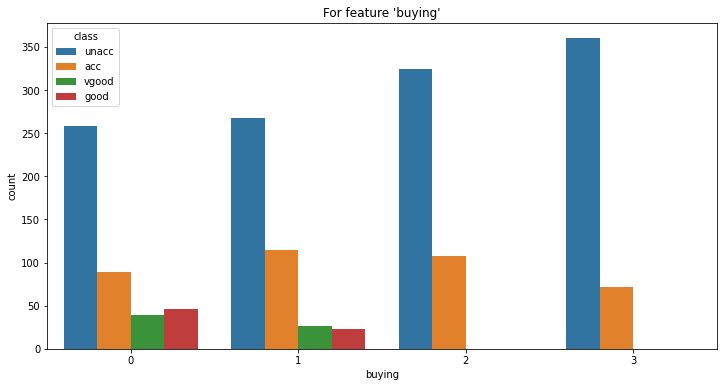

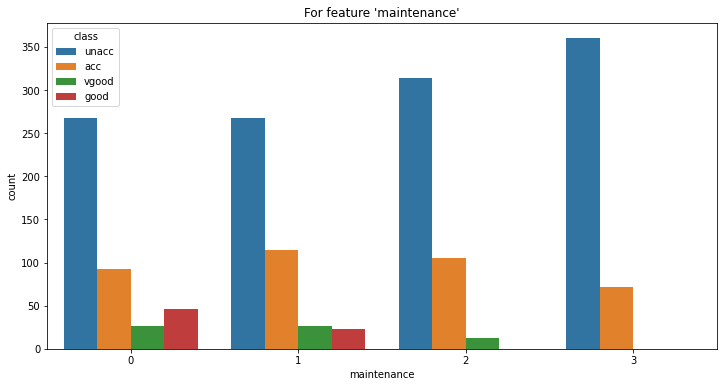

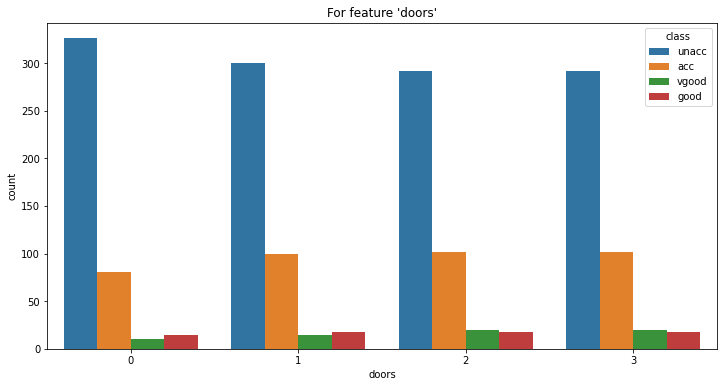

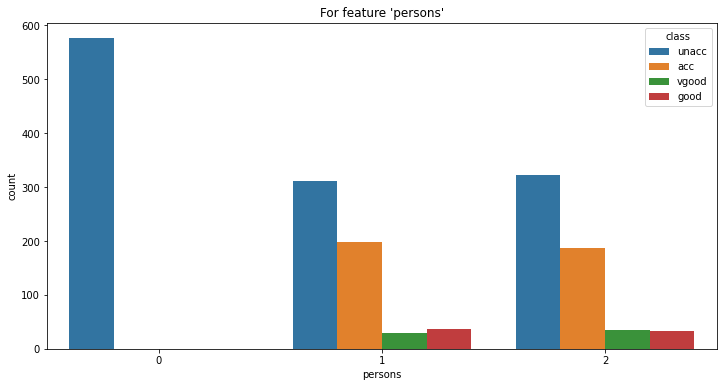

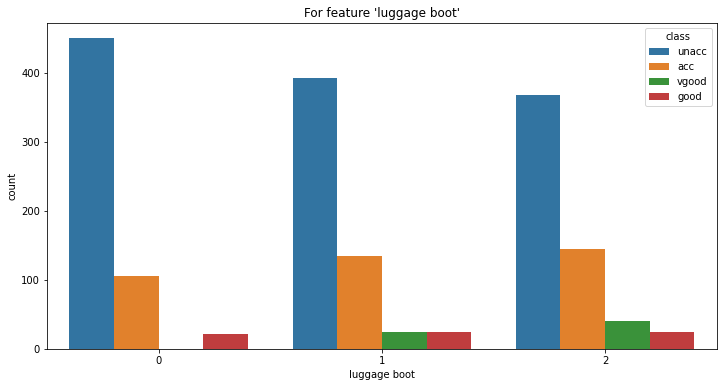

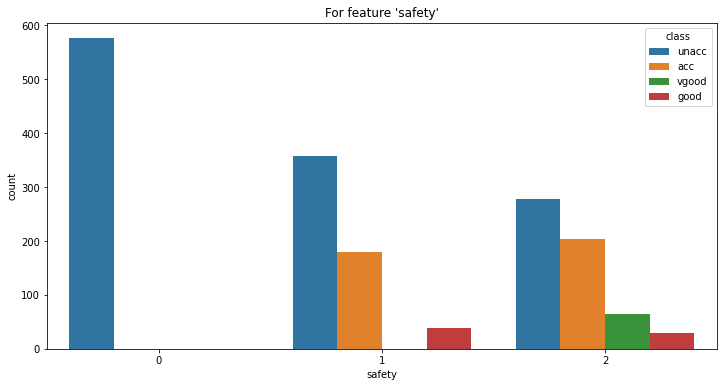

In [7]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data_enc[i],hue=data['class'])


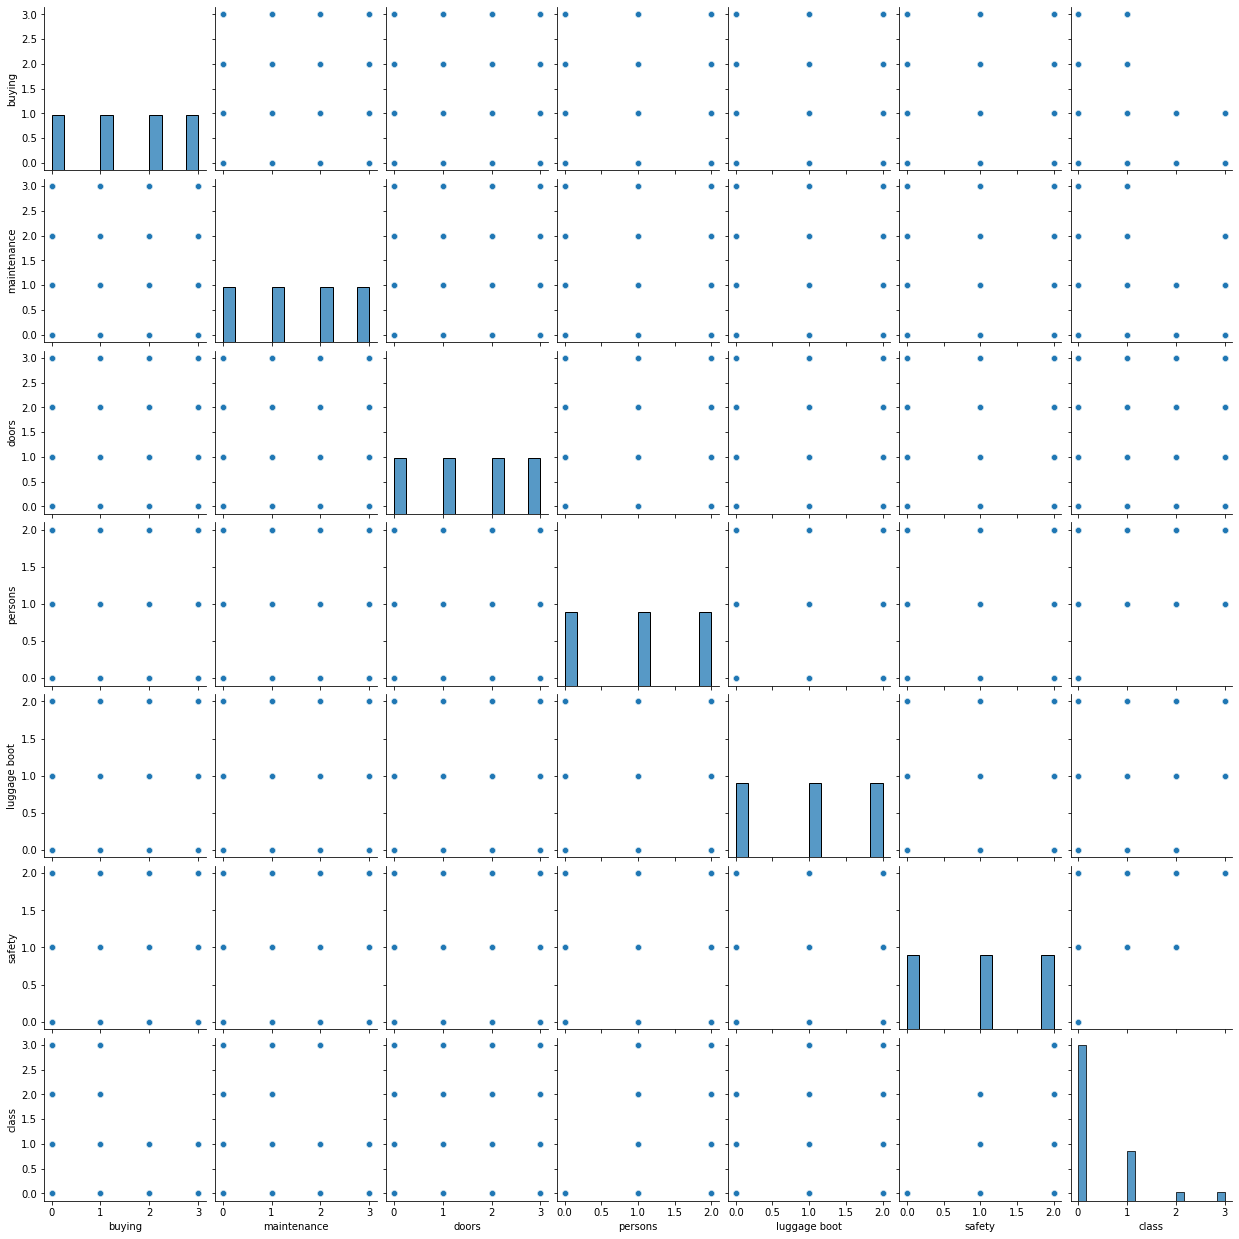

In [8]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns

# without regression
sns.pairplot(data_enc, kind="scatter")
plt.show()

C:\Users\a7med\anaconda3\envs\Main_ml\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


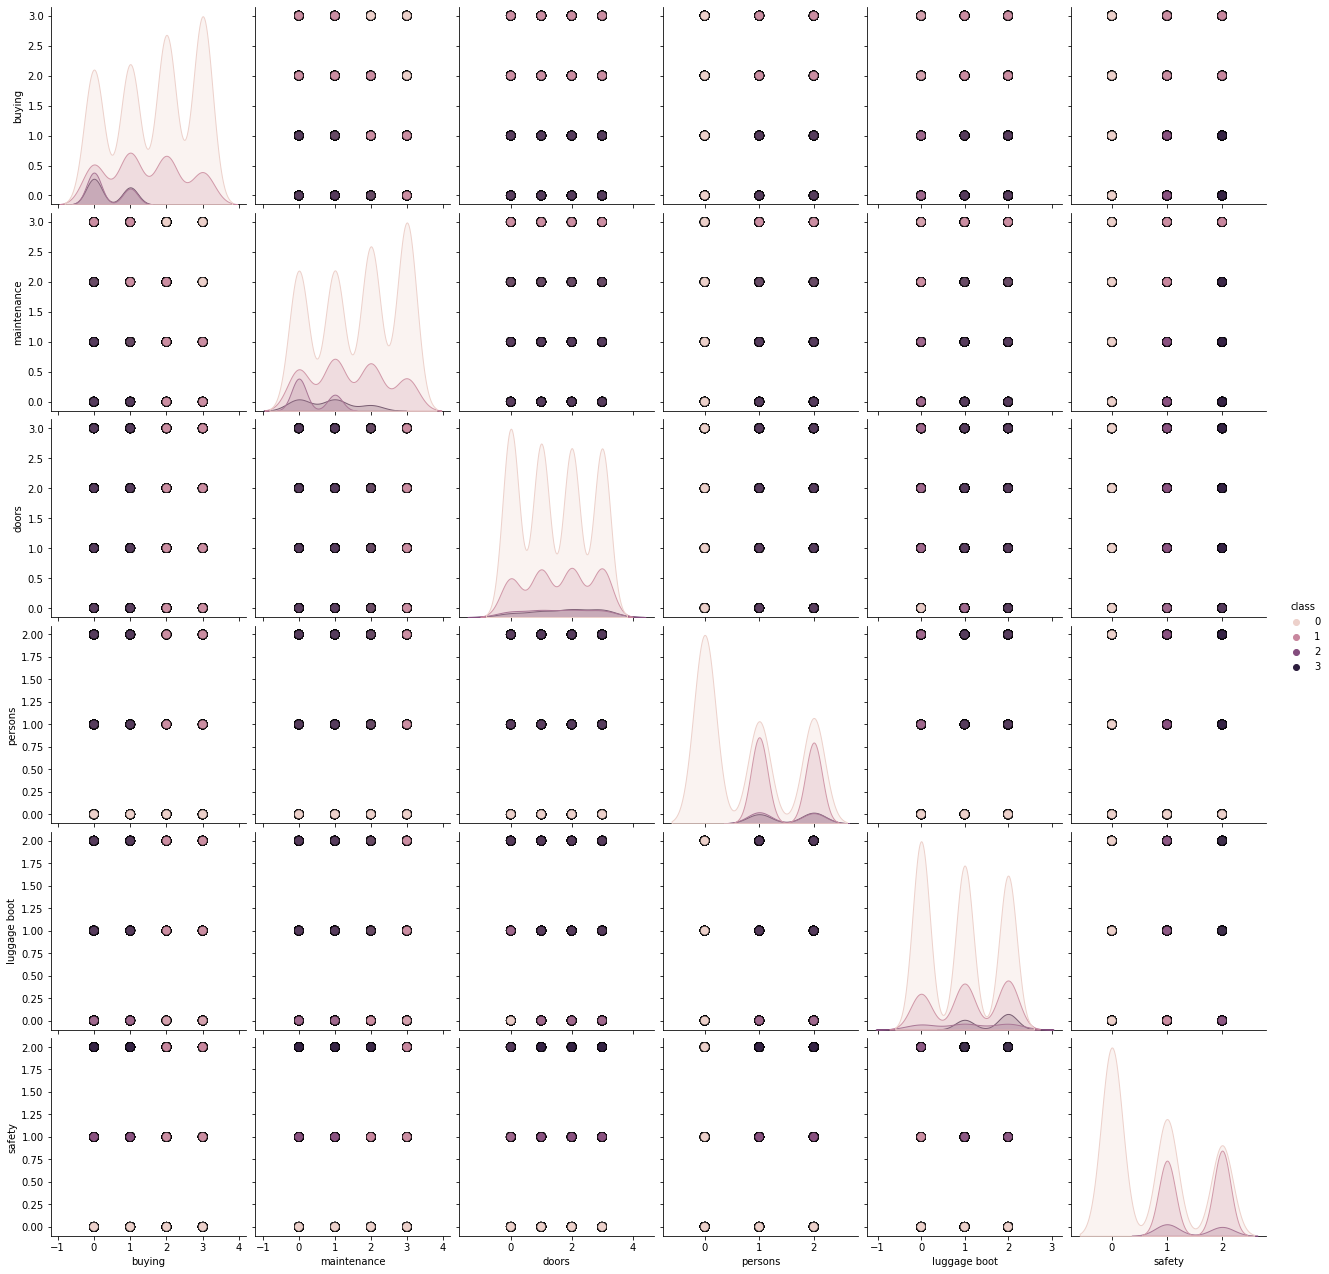

In [9]:
# Seaborn visualization library
import seaborn as sns

# Create a pair plot colored by continent with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(data_enc, hue = 'class', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3)

- scatterplot confirms it is clear that all the attributes except the label are distributed equally among data.

## Question 1 answers



###### Explore the data and answer the following:
###### What type of attributes of the data?
all the attributes are categorical ordinal
###### Using a scatter plot, what pattern can you see? Why?
scatterplot confirms it is clear that all the attributes except the label are distributed equally among data.

In [10]:
X = data_enc.iloc[:,:-1] # Select all attributes that was cleaned and turned into numerical values
y = data_enc.iloc[:,-1:] # Classification on care 'class' (target attribute)
display(X.shape)
display(y.shape)

(1728, 6)

(1728, 1)

In [11]:
#Import train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split
# split the data into training set and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)


(1209, 6)

(519, 6)

(1209, 1)

(519, 1)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       380
           1       0.72      0.68      0.70       104
           2       0.87      0.52      0.65        25
           3       0.77      1.00      0.87        10

    accuracy                           0.86       519
   macro avg       0.81      0.78      0.78       519
weighted avg       0.86      0.86      0.85       519

The Cross valadtion score is:  0.8411885737800487


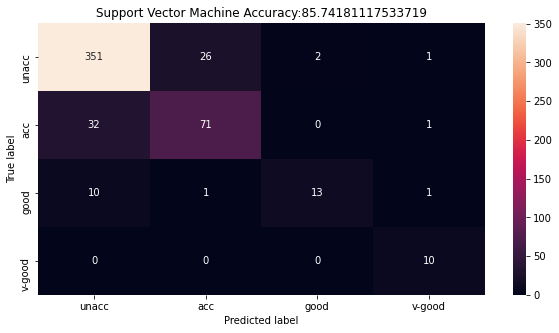

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


svc= SVC(C=1.0, kernel='linear', gamma = 0.001)
svc.fit(x_train, y_train.values.ravel())
y_pred = svc.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['unacc','acc','good','v-good'],
columns = ['unacc','acc','good','v-good'])

# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Support Vector Machine Accuracy:" + str(svc.score(x_test,y_test)*100))

print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))
score = cross_val_score(svc, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("The Cross valadtion score is: ",score.mean())


In [13]:
from sklearn.model_selection import GridSearchCV
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

param_grid = {'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svc, param_grid)
grid.fit(x_train, y_train.values.ravel()) 
gridSVM=grid.best_params_ 

print(gridSVM)


{'C': 50, 'gamma': 0.0001}


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       380
           1       0.73      0.69      0.71       104
           2       0.88      0.60      0.71        25
           3       0.91      1.00      0.95        10

    accuracy                           0.86       519
   macro avg       0.85      0.80      0.82       519
weighted avg       0.86      0.86      0.86       519

The Cross valadtion score is:  0.8478070025033435


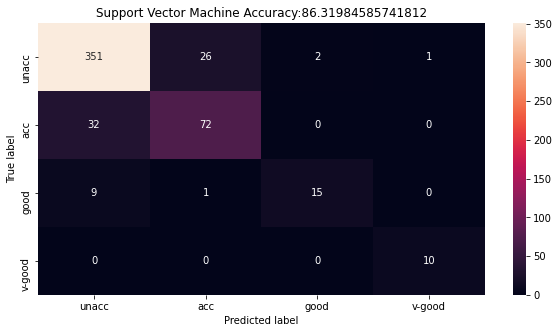

In [14]:
#model = grid.best_estimator_

svcGrid= SVC(C=50, kernel='linear', gamma = 0.0001)
svcGrid.fit(x_train, y_train.values.ravel())
yfitGrid = svcGrid.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, yfitGrid)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['unacc','acc','good','v-good'],
columns = ['unacc','acc','good','v-good'])


# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Support Vector Machine Accuracy:" + str(svcGrid.score(x_test,y_test)*100))

print(classification_report(y_test,yfitGrid,labels=np.unique(yfitGrid)))
score = cross_val_score(svcGrid, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("The Cross valadtion score is: ",score.mean())



              precision    recall  f1-score   support

           0       0.83      0.95      0.89       380
           1       0.46      0.38      0.41       104

   micro avg       0.77      0.83      0.80       484
   macro avg       0.65      0.66      0.65       484
weighted avg       0.75      0.83      0.79       484

The Cross valadtion score is:  0.7402832550324063


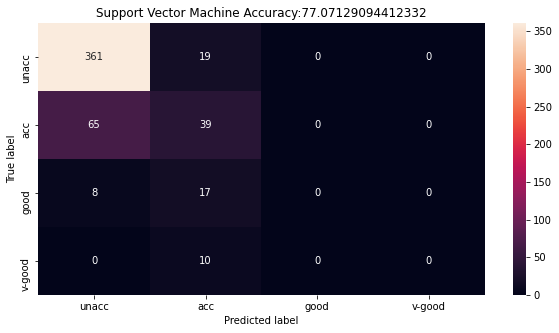

In [15]:
svcGrid_rbf= SVC(C=50, kernel='rbf', gamma = 0.0001)
svcGrid_rbf.fit(x_train, y_train.values.ravel())
yfitGrid_rbf = svcGrid_rbf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, yfitGrid_rbf)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['unacc','acc','good','v-good'],
columns = ['unacc','acc','good','v-good'])


# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Support Vector Machine Accuracy:" + str(svcGrid_rbf.score(x_test,y_test)*100))

print(classification_report(y_test,yfitGrid_rbf,labels=np.unique(yfitGrid_rbf)))
score = cross_val_score(svcGrid_rbf, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("The Cross valadtion score is: ",score.mean())


              precision    recall  f1-score   support

           0       0.74      1.00      0.85       380
           1       0.00      0.00      0.00       104

   micro avg       0.73      0.79      0.76       484
   macro avg       0.37      0.50      0.43       484
weighted avg       0.58      0.79      0.67       484

The Cross valadtion score is:  0.6865196666780975


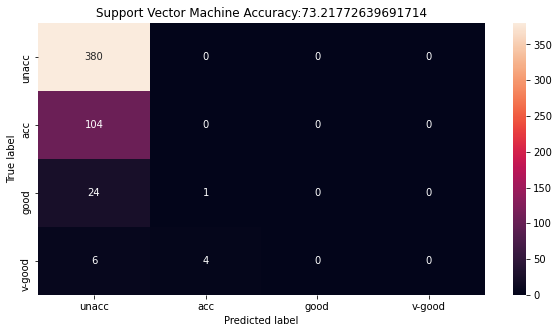

In [16]:
svcGrid_sigmoid= SVC(C=50, kernel='sigmoid', gamma = 0.0001)
svcGrid_sigmoid.fit(x_train, y_train.values.ravel())
yfitGrid_sigmoid = svcGrid_sigmoid.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, yfitGrid_sigmoid)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['unacc','acc','good','v-good'],
columns = ['unacc','acc','good','v-good'])


# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Support Vector Machine Accuracy:" + str(svcGrid_sigmoid.score(x_test,y_test)*100))

print(classification_report(y_test,yfitGrid_sigmoid,labels=np.unique(yfitGrid_sigmoid)))
score = cross_val_score(svcGrid_sigmoid, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("The Cross valadtion score is: ",score.mean())


###### Question 2
Experiment with the SVM algorithm introduced in this lab to predict the class of the data. Use default parameter configurations. Then, try to conduct also cross-validation as per the one applied in this lab. Compare the algorithms and specify your findings. Answer the following questions:
###### Do cross-validation effect algorithms' performance?
Cross-validation does improve on the performance except the implementation of SVM with default parameters   
###### Test SVM with at least two other kernels and compare them to the linear kernel. How much they differ?
Sigmoid and rbf have been tested, they have lower accuracy and performance for the chosen dataset, In addition failed to find the precision and recall for some of the class targets
